In [1]:
print('setup working')

setup working


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#read csv 
df = pd.read_csv('orders.csv', delimiter=";")
print(df.head())

         Order ID   Segment    Ship Mode   Value
0  CA-2011-103366  Consumer  First Class  149,95
1  CA-2011-109043  Consumer  First Class   243,6
2  CA-2011-113166  Consumer  First Class   9,568
3  CA-2011-124023  Consumer  First Class    8,96
4  CA-2011-130155  Consumer  First Class    34,2


In [4]:
df_cleaned = df.copy()

In [5]:
#count 
print(df_cleaned['Segment'].value_counts())
print(df_cleaned['Ship Mode'].value_counts())



Segment
Consumer       73
Corporate      41
Home Office    13
Name: count, dtype: int64
Ship Mode
Standard Class    498
Second Class      167
First Class       127
Same Day           42
Name: count, dtype: int64


In [6]:
# remove white spaces from column names (do not overwrite df_cleaned)
# previously df_cleaned = df.columns.str.strip() set df_cleaned to an Index; fix by modifying columns

df_cleaned.columns = df_cleaned.columns.str.strip()

In [7]:
df_cleaned.head()

,Order ID,Segment,Ship Mode,Value
0,CA-2011-103366,Consumer,First Class,"149,95"
1,CA-2011-109043,Consumer,First Class,"243,6"
2,CA-2011-113166,Consumer,First Class,"9,568"
3,CA-2011-124023,Consumer,First Class,"8,96"
4,CA-2011-130155,Consumer,First Class,"34,2"


In [8]:
#check shape and info
df_cleaned.shape
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Order ID   834 non-null    object
 1   Segment    127 non-null    object
 2   Ship Mode  834 non-null    object
 3   Value      834 non-null    object
dtypes: object(4)
memory usage: 26.2+ KB


In [9]:
#check stats
df_cleaned.describe()

,Order ID,Segment,Ship Mode,Value
count,834,127,834,834
unique,823,3,4,810
top,Grand Total,Consumer,Standard Class,"15,552"
freq,12,73,498,4


In [10]:
df_cleaned['Value'].isnull().sum()


np.int64(0)

In [11]:
# rename Ship Mode column in df_cleaned (operate on df_cleaned, not df)

df_cleaned.rename(columns={'Ship Mode': 'Ship_Mode'}, inplace=True)


In [12]:
df_cleaned['Ship_Mode'] = df_cleaned['Ship_Mode'].str.replace(" ", "_")
df_cleaned['Segment'] = df_cleaned['Segment'].str.replace(" ", "_")

In [13]:
# fix value column first
# fix European-style numbers

df_cleaned['Value'] = df_cleaned['Value'].astype(str).str.replace(',', '.').str.strip()

# convert to numeric safely (use df_cleaned on RHS)
df_cleaned['Value'] = pd.to_numeric(df_cleaned['Value'], errors='coerce')


In [14]:
# subset drop value as it is the target variable; use inplace=True or assign to df_cleaned

df_cleaned.dropna(subset=['Value'], inplace=True)


In [15]:
#data cleaning
#check for missing values
missing = df_cleaned.isnull().sum().sort_values(ascending=False)
missing_perc = (df_cleaned.isnull().sum()/len(df_cleaned)*100).sort_values(ascending=False)
pd.concat([missing, missing_perc], axis=1, keys=['Missing Values', '% of Total Values']).transpose()        


,Segment,Order ID,Ship_Mode,Value
Missing Values,707.000000,0.0,0.0,0.0
% of Total Values,84.772182,0.0,0.0,0.0


In [16]:
for col in ['Segment', 'Ship_Mode']:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0]).str.strip()


In [17]:
#check missing value again
df_cleaned.isnull().sum()

Order ID     0
Segment      0
Ship_Mode    0
Value        0
dtype: int64

In [18]:
#check duplicates 
df_cleaned_duplicates = df_cleaned.duplicated().sum()
print(f'The number of duplicate rows is: {df_cleaned_duplicates}')


The number of duplicate rows is: 0


In [19]:
# remove duplicate rows; use inplace=True to actually remove them

df_cleaned.drop_duplicates(inplace=True)
print(f'The number of duplicate rows after removing duplicates is: {df_cleaned.duplicated().sum()}')
print(f'The new shape of the dataframe is: {df_cleaned.shape}')

The number of duplicate rows after removing duplicates is: 0
The new shape of the dataframe is: (834, 4)


In [20]:
#change data types
df_cleaned['Segment']= df_cleaned['Segment'].astype('category')



In [21]:
df_cleaned['Ship_Mode']= df_cleaned['Ship_Mode'].astype('category')

In [22]:
#count 
print(df_cleaned['Segment'].value_counts())
print(df_cleaned['Ship_Mode'].value_counts())

Segment
Consumer       780
Corporate       41
Home_Office     13
Name: count, dtype: int64
Ship_Mode
Standard_Class    498
Second_Class      167
First_Class       127
Same_Day           42
Name: count, dtype: int64


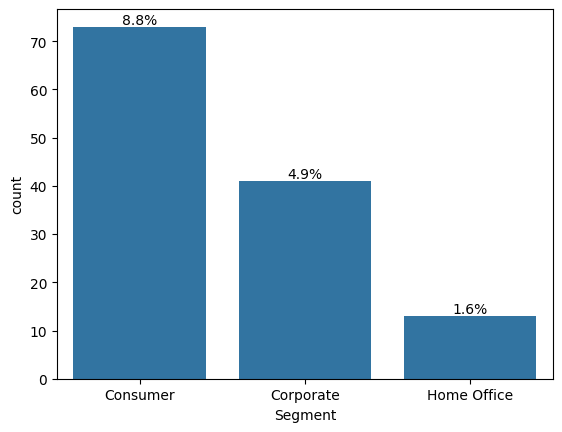

In [23]:
ax = sns.countplot(x='Segment', data=df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/len(df):.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()


EDA

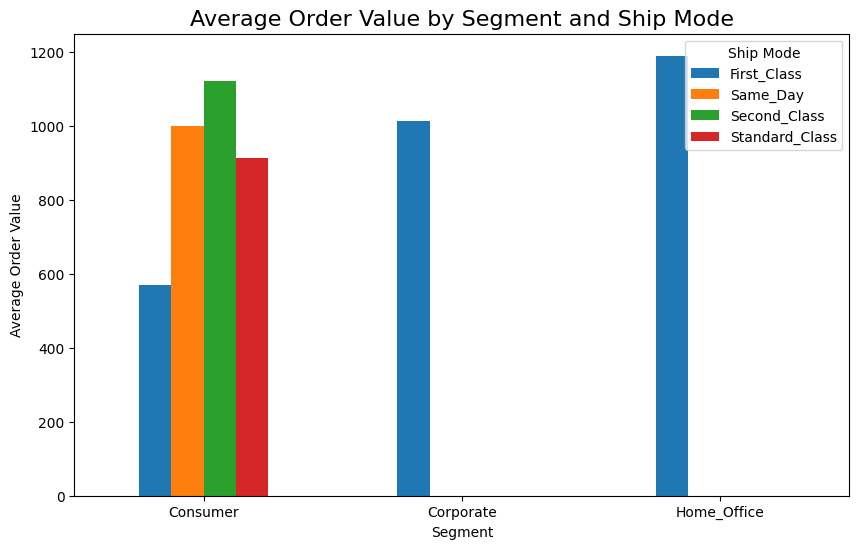

In [24]:
# calculate average order value for each segment-ship mode combination
grouped = df_cleaned.groupby(['Segment','Ship_Mode'])['Value'].mean().unstack()

# clot grouped bar chart
grouped.plot(kind='bar', figsize=(10,6))
plt.title('Average Order Value by Segment and Ship Mode', fontsize=16)
plt.ylabel('Average Order Value')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.legend(title='Ship Mode')
plt.show()


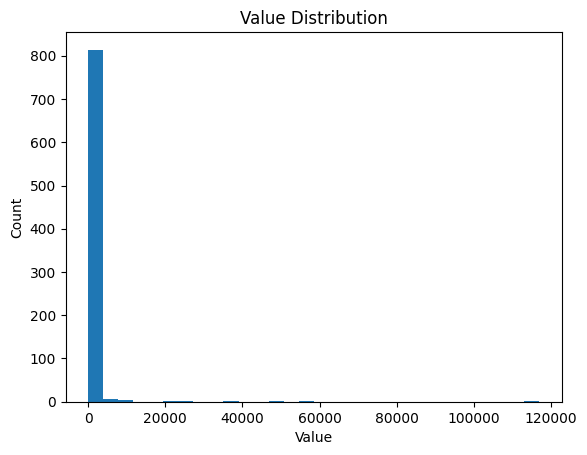

In [25]:
#visualize value distribution
plt.hist(df_cleaned['Value'], bins=30)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


In [26]:
df_cleaned.dtypes

Order ID       object
Segment      category
Ship_Mode    category
Value         float64
dtype: object

In [27]:
print(type(df_cleaned))
print(df_cleaned)


<class 'pandas.core.frame.DataFrame'>
           Order ID   Segment       Ship_Mode       Value
0    CA-2011-103366  Consumer     First_Class    149.9500
1    CA-2011-109043  Consumer     First_Class    243.6000
2    CA-2011-113166  Consumer     First_Class      9.5680
3    CA-2011-124023  Consumer     First_Class      8.9600
4    CA-2011-130155  Consumer     First_Class     34.2000
..              ...       ...             ...         ...
829  US-2014-132031  Consumer  Standard_Class    513.4960
830  US-2014-132297  Consumer  Standard_Class    598.3100
831  US-2014-132675  Consumer  Standard_Class    148.1600
832  US-2014-156083  Consumer  Standard_Class      9.6640
833     Grand Total  Consumer  Standard_Class  54748.6325

[834 rows x 4 columns]


In [28]:
#save as csv
df_cleaned= df_cleaned.to_csv("orders_clean.csv", index=False)